In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import readsav
from scipy.ndimage import uniform_filter
import inspect

In [16]:
def describe_array(arr):
    # Ensure the array is a NumPy array
    arr = np.array(arr)

    # Calculate statistics
    stats = {
        'count': arr.size,
        'mean': np.mean(arr),
        'std': np.std(arr),
        'min': np.min(arr),
        '25%': np.percentile(arr, 25),
        '50%': np.median(arr),
        '75%': np.percentile(arr, 75),
        'max': np.max(arr),
    }

    # Print statistics
    for stat, value in stats.items():
        print(f"{stat}: {value:.4f}")


In [2]:
data_path = '/Users/masonjp2/Desktop/debugging snr/'

py = np.load(data_path + 'python pure noise snr snr_smooth.npz', allow_pickle=True)
py_pure = py['arr1']
py_noise = py['arr2']
py_snr = py['arr3']
py_snr_smooth = py['arr4']

idl = readsav(data_path + 'idl pure noise snr snr_smooth.sav')
idl_pure = idl['rebin_pure_image']
idl_noise = idl['local_rms']
idl_snr = idl['snr']
idl_snr_smooth = idl['snr_smooth']


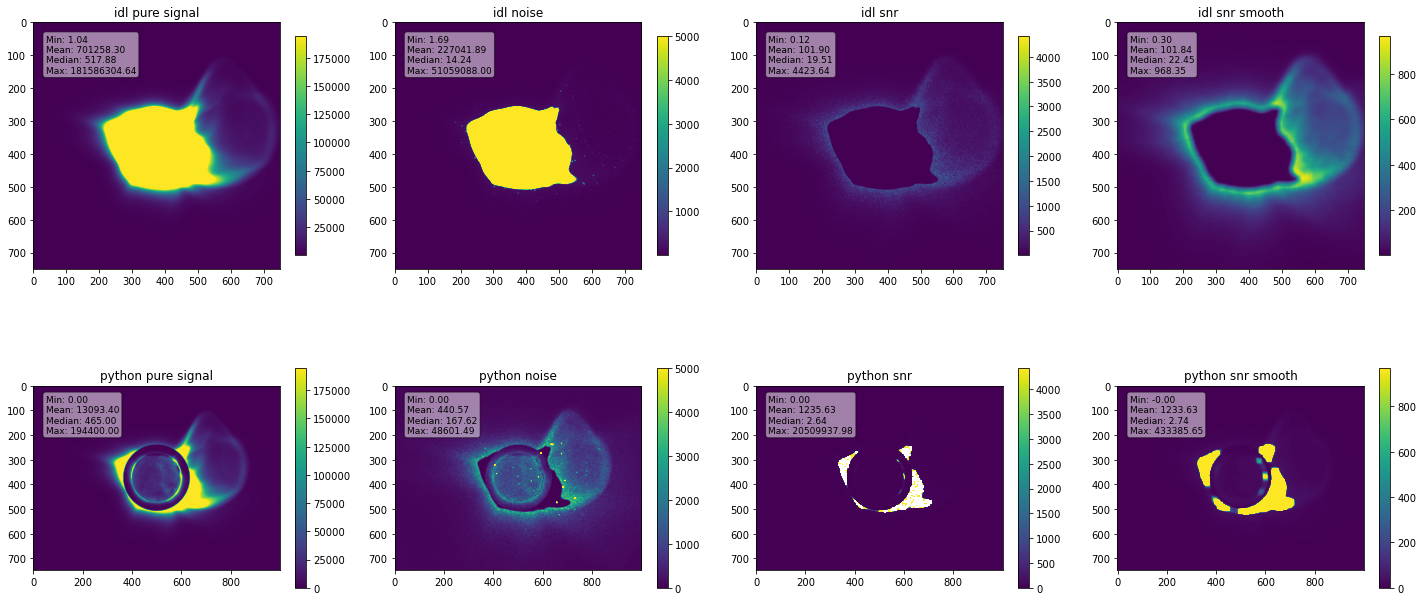

In [13]:
def nanmax(array): 
    return np.nanmax(np.where(array == np.inf, np.nan, array))

def nanmean(array):
    return np.nanmean(np.where(array == np.inf, np.nan, array))


data = [idl_pure, idl_noise, idl_snr, idl_snr_smooth, py_pure, py_noise, py_snr, py_snr_smooth]
titles = ['idl pure signal', 'idl noise', 'idl snr', 'idl snr smooth', 'python pure signal', 'python noise', 'python snr', 'python snr smooth']
#vmax_values = [nanmax(py_pure), nanmax(py_noise), nanmax(idl_snr), nanmax(idl_snr_smooth), nanmax(py_pure), nanmax(py_noise), nanmax(idl_snr), nanmax(idl_snr_smooth)]
vmax_values = [nanmax(py_pure), 5000, nanmax(idl_snr), nanmax(idl_snr_smooth), nanmax(py_pure), 5000, nanmax(idl_snr), nanmax(idl_snr_smooth)]

# Set up the figure and GridSpec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 4, figure=fig)

# Create each subplot using imshow()
for i in range(2):
    for j in range(4):
        index = i*4 + j
        img_data = data[index]
        
        ax = fig.add_subplot(gs[i, j])
        cax = ax.imshow(img_data, cmap='viridis', aspect='equal', vmax=vmax_values[i*4 + j])
        fig.colorbar(cax, ax=ax, shrink=0.6)
        ax.set_title(titles[i*4 + j])

        # Calculate statistics
        data_min = np.min(img_data)
        data_mean = nanmean(img_data)
        data_median = np.median(img_data)
        data_max = nanmax(img_data)

        # Format the annotation text
        stats_text = f"Min: {data_min:.2f}\nMean: {data_mean:.2f}\nMedian: {data_median:.2f}\nMax: {data_max:.2f}"

        # Annotate the plot with statistics in the upper left corner
        ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=9, 
                verticalalignment='top', horizontalalignment='left', 
                bbox=dict(boxstyle="round", alpha=0.5, facecolor="white"))



plt.tight_layout()

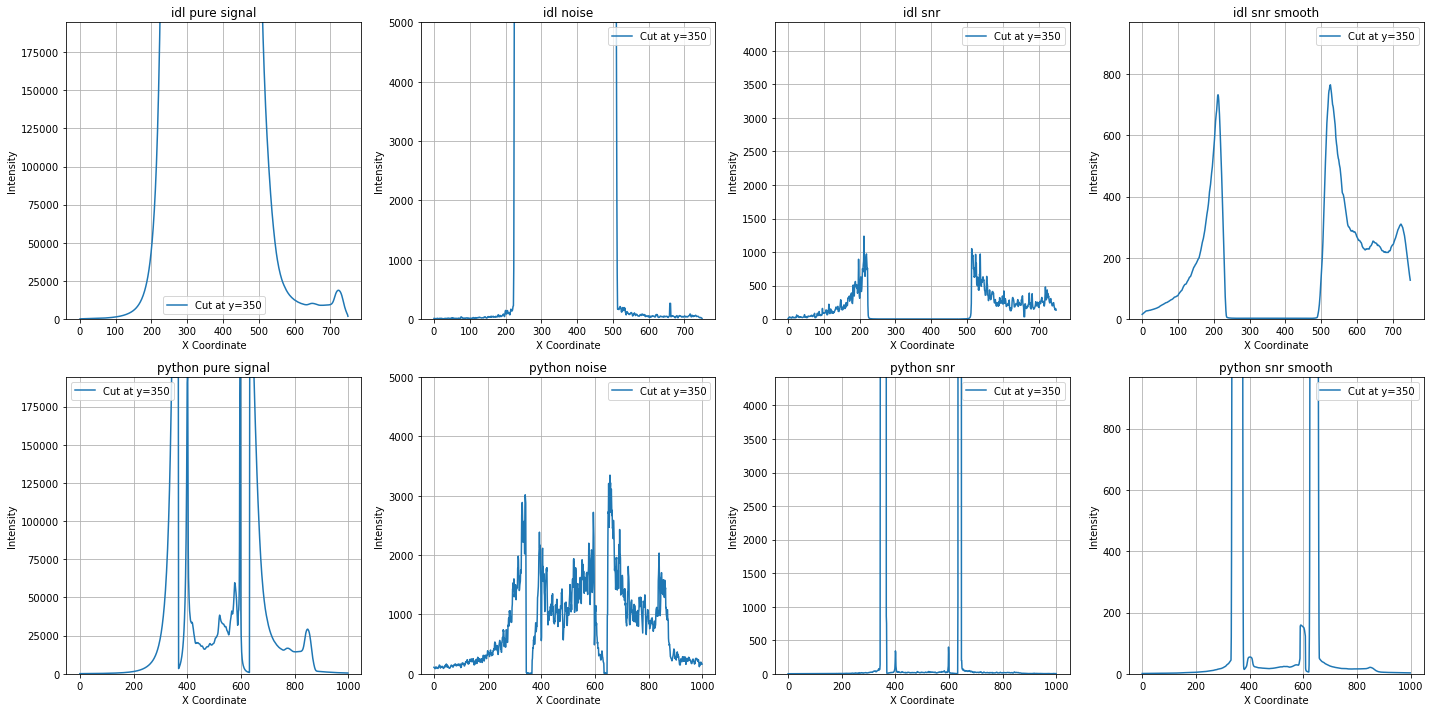

In [14]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 4, figure=fig)

for i in range(2):
    for j in range(4):
        index = i*4 + j
        img_data = data[index]

        # Extract the row at y=350
        y_cut = img_data[350, :]

        ax = fig.add_subplot(gs[i, j])
        ax.plot(y_cut, label=f'Cut at y=350')
        ax.set_ylim(0, vmax_values[index])
        
        # Optionally, customize your plot with grid, labels, etc.
        ax.grid(True)
        ax.legend()
        ax.set_title(titles[i*4 + j])
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Intensity')

plt.tight_layout()

In [17]:
describe_array(idl_noise[350, 562:])

count: 188.0000
mean: 53.9643
std: 30.7177
min: 14.0590
25%: 40.7533
50%: 49.6585
75%: 58.6989
max: 267.6933


In [18]:
describe_array(py_noise[350, 687:875])

count: 188.0000
mean: 1165.8126
std: 331.7336
min: 599.0121
25%: 909.8070
50%: 1074.7097
75%: 1357.2175
max: 2430.7486


# Compare Noise

## Compare dark noise

In [30]:
py_dark = np.load(data_path + 'python dark noise 15sec -10degC for current_mean0.46.npy', allow_pickle=True)

idl_dark = readsav(data_path + 'idl dark noise 15sec -4degC for current_mean1.0.sav')['darkframe_base']
idl_dark_with_shot = readsav(data_path + 'idl dark noise with its own shot noise 15sec -4degC for current_mean1.0.sav')['dark_final']


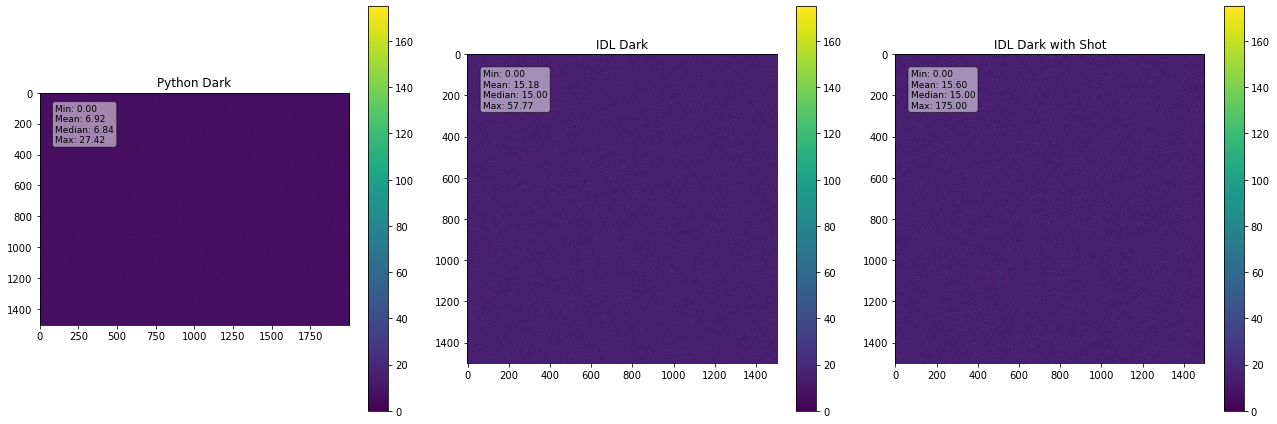

In [33]:
vmax = max(np.nanmax(py_dark), np.nanmax(idl_dark), np.nanmax(idl_dark_with_shot))

# Set up the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot each image with the unified vmax
images = [py_dark, idl_dark, idl_dark_with_shot]
titles = ['Python Dark', 'IDL Dark', 'IDL Dark with Shot']

for ax, img, title in zip(axs, images, titles):
    # Compute statistics excluding NaN and infinities
    valid_data = img[np.isfinite(img)]
    data_min = np.min(valid_data)
    data_mean = np.mean(valid_data)
    data_median = np.median(valid_data)
    data_max = np.max(valid_data)
    
    # Format the annotation text
    stats_text = f"Min: {data_min:.2f}\nMean: {data_mean:.2f}\nMedian: {data_median:.2f}\nMax: {data_max:.2f}"
    
    cax = ax.imshow(img, cmap='viridis', vmax=vmax)
    ax.set_title(title)
    
    # Add the text box annotation in the upper left corner
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=9, 
            verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.5, facecolor="white"))
    
    # Add a colorbar for each plot
    fig.colorbar(cax, ax=ax)

plt.tight_layout()

## Compare read noise

In [34]:
py_read = np.load(data_path + 'python read noise.npy', allow_pickle=True)

idl_read = readsav(data_path + 'idl read noise.sav')['readframe']

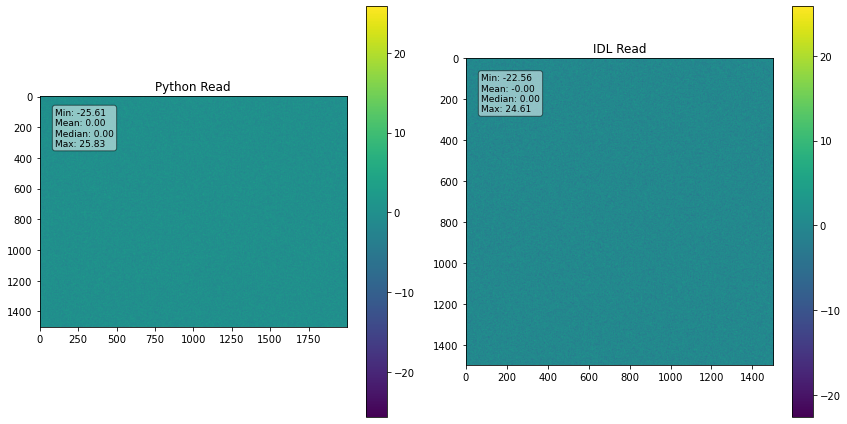

In [37]:
vmax = max(np.nanmax(py_read), np.nanmax(idl_read))

# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot each image with the unified vmax
images = [py_read, idl_read]
titles = ['Python Read', 'IDL Read']

for ax, img, title in zip(axs, images, titles):
    # Compute statistics excluding NaN and infinities
    valid_data = img[np.isfinite(img)]
    data_min = np.min(valid_data)
    data_mean = np.mean(valid_data)
    data_median = np.median(valid_data)
    data_max = np.max(valid_data)
    
    # Format the annotation text
    stats_text = f"Min: {data_min:.2f}\nMean: {data_mean:.2f}\nMedian: {data_median:.2f}\nMax: {data_max:.2f}"
    
    cax = ax.imshow(img, cmap='viridis', vmax=vmax)
    ax.set_title(title)
    
    # Add the text box annotation in the upper left corner
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=9, 
            verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.5, facecolor="white"))
    
    # Add a colorbar for each plot
    fig.colorbar(cax, ax=ax)

plt.tight_layout()

## Compare photon shot noise

In [138]:
def compare_histograms(array1, array2):
    # Get the names of the variables passed in
    frame = inspect.currentframe()
    call_frame = inspect.getouterframes(frame)[1]
    var_names = [var_name for var_name, var_val in call_frame.frame.f_locals.items() if var_val is array1 or var_val is array2]

    # Flatten the arrays to 1D for histogram plotting
    array1_flat = array1.ravel()
    array2_flat = array2.ravel()

    bins = 50

    # Calculate histograms
    hist1, bin_edges1 = np.histogram(array1_flat, bins=bins)
    hist2, bin_edges2 = np.histogram(array2_flat, bins=bins)

    # Exclude the first bin
    hist1 = hist1[1:]
    bin_edges1 = bin_edges1[1:]
    hist2 = hist2[1:]
    bin_edges2 = bin_edges2[1:]

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the histograms
    ax1.bar(bin_edges1[:-1], hist1, width=np.diff(bin_edges1), edgecolor='black', align='edge', color='blue', alpha=0.7)
    ax2.bar(bin_edges2[:-1], hist2, width=np.diff(bin_edges2), edgecolor='black', align='edge', color='red', alpha=0.7)

    ax1.set_title('Histogram of {}'.format(var_names[0]))
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax2.set_title('Histogram of {}'.format(var_names[1]))
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Frequency')

    plt.tight_layout()  # Adjust the layout

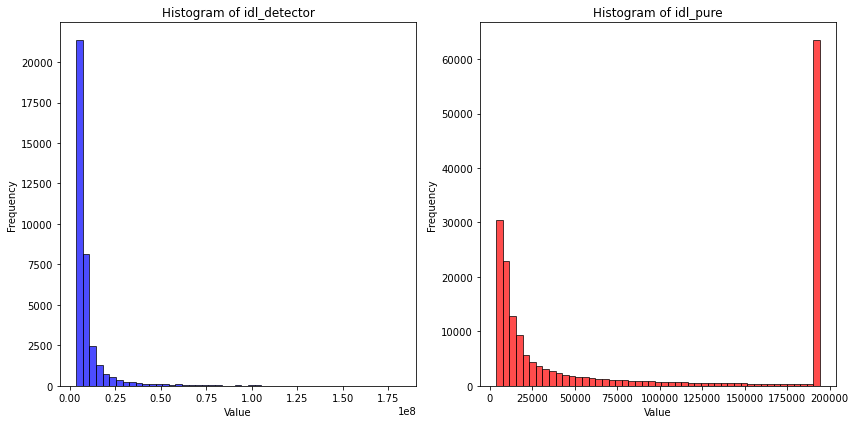

In [139]:
compare_histograms(idl_pure, idl_detector)

In [114]:
describe_array(idl_local_rms)

count: 562500.0000
mean: 227041.8125
std: 1292917.1250
min: 1.3597
25%: 9.1148
50%: 14.3035
75%: 46.0819
max: 51059088.0000


In [103]:
describe_array(py_local_std)

count: 750000.0000
mean: 896.3085
std: 2519.5281
min: 0.0013
25%: 78.4602
50%: 193.7481
75%: 585.5536
max: 44412.8637


In [115]:
describe_array(idl_pure)

count: 562500.0000
mean: 701258.3006
std: 3909311.1533
min: 1.0432
25%: 66.5188
50%: 517.8822
75%: 10659.0672
max: 181586304.6412


In [110]:
describe_array(py_pure)

count: 750000.0000
mean: 14960.0520
std: 39033.7608
min: 0.0000
25%: 108.2360
50%: 595.3514
75%: 6683.4315
max: 194400.0000


In [105]:
def plot_snr(smoothed_snr_map, image):
    # Create a figure and a set of subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Display the image in the first subplot
    im = ax1.imshow(image, cmap='gray', origin='lower')

    # Overlaying the SNR contours on the first subplot
    contour_levels = [10, 40]
    ax1.contour(smoothed_snr_map, levels=[10], colors='red', linewidths=2)
    ax1.contour(smoothed_snr_map, levels=[40], colors='dodgerblue', linewidths=2)

    # Add the horizontal line for the trace
    vertical_center = round(smoothed_snr_map.shape[0] / 2.5)
    ax1.axhline(y=vertical_center, color='limegreen', linestyle='--', linewidth=2)

    # Set the title and labels for the first subplot
    ax1.set_xlabel('X Pixel')
    ax1.set_ylabel('Y Pixel')

    # Adjusting the ticks for solar radii
    height, width = image.shape
    center_x, center_y = width // 2, height // 2
    scale_factor = 100  # 100 pixels per solar radius

    x_ticks = np.arange(0, width, scale_factor)
    x_labels = (x_ticks - center_x) / scale_factor
    y_ticks = np.arange(0, height, scale_factor)
    y_labels = (y_ticks - center_y) / scale_factor

    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels([f"{x:.1f}" for x in x_labels])
    ax1.set_yticks(y_ticks)
    ax1.set_yticklabels([f"{y:.1f}" for y in y_labels])

    ax1.set_xlabel("Solar Radii")
    ax1.set_ylabel("Solar Radii")

    # Plot the horizontal trace in the second subplot
    horizontal_trace = smoothed_snr_map[vertical_center, :]
    ax2.plot(horizontal_trace, color='limegreen')

    # Add vertical line at 3.5 Rs
    pixel_position = center_x + int(3.5 * scale_factor)
    ax2.axvline(x=pixel_position, color='black', linestyle='--', linewidth=1)

    # Adjust the x-axis to represent solar radii
    num_pixels = len(horizontal_trace)
    x_ticks = np.arange(0, num_pixels, scale_factor)
    x_labels = (x_ticks - num_pixels // 2) / scale_factor
    ax2.set_xticks(x_ticks)
    ax2.set_xticklabels([f"{x:.1f}" for x in x_labels])

    # Set labels and title for the second subplot
    ax2.set_title('SNR Horizontal Trace')
    ax2.set_xlabel('Solar Radii')
    ax2.set_ylabel('SNR')
    ax2.set_ylim(0, np.max(contour_levels))
    ax2.grid(True)

    plt.show()

    # Print SNR value at +3.5 Rs
    snr_at_3_5 = smoothed_snr_map[vertical_center, pixel_position]
    print('SNR at +3.5 Rs = {:.0f}'.format(snr_at_3_5))

In [127]:
def plot_together(array1, array2):
    # Get the names of the variables passed in
    frame = inspect.currentframe()
    call_frame = inspect.getouterframes(frame)[1]
    var_names = [var_name for var_name, var_val in call_frame.frame.f_locals.items() if var_val is array1 or var_val is array2]

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first array
    ax1.imshow(array1, cmap='gray')
    ax1.set_title(var_names[0])
    ax1.axis('off')  # Turn off axis

    # Plot the second array
    ax2.imshow(array2, cmap='gray')
    ax2.set_title(var_names[1])
    ax2.axis('off')  # Turn off axis

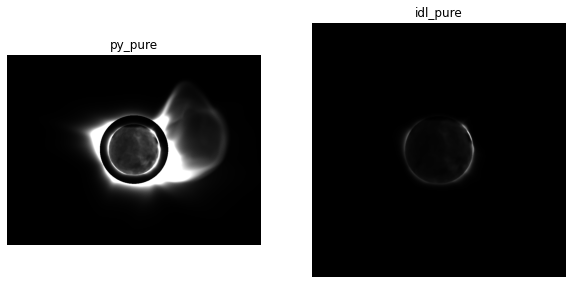

In [129]:
plot_together(py_pure, idl_pure)

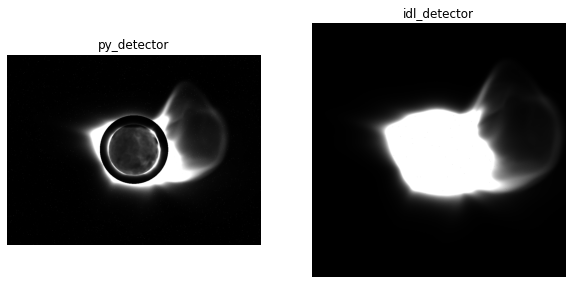

In [128]:
plot_together(py_detector, idl_detector)

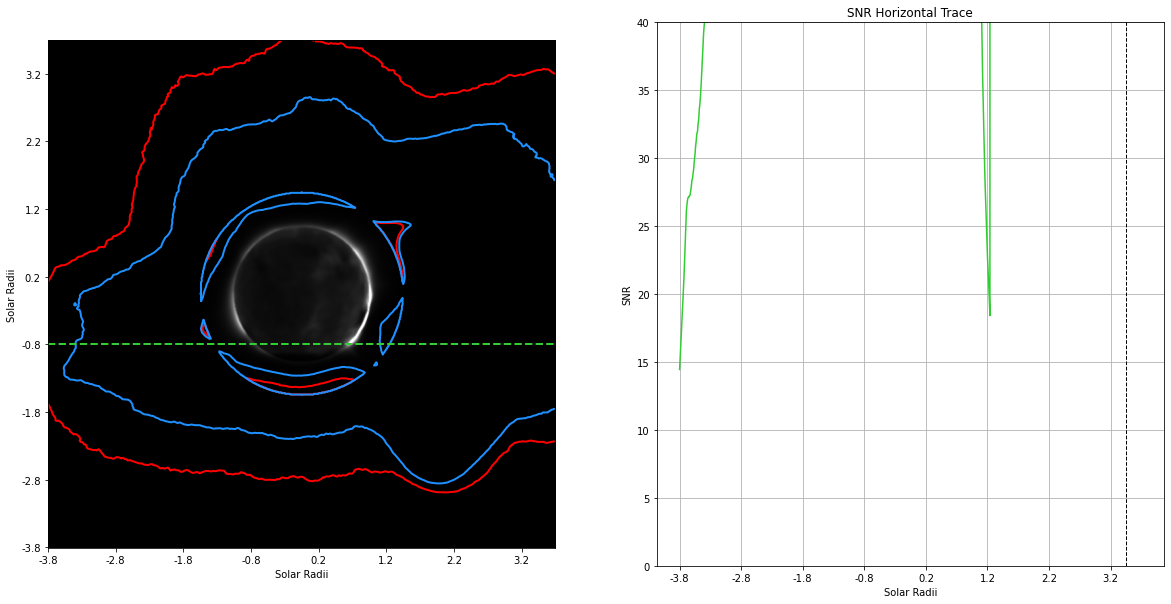

SNR at +3.5 Rs = 253


In [81]:
plot_snr(idl_snr, idl_detector)

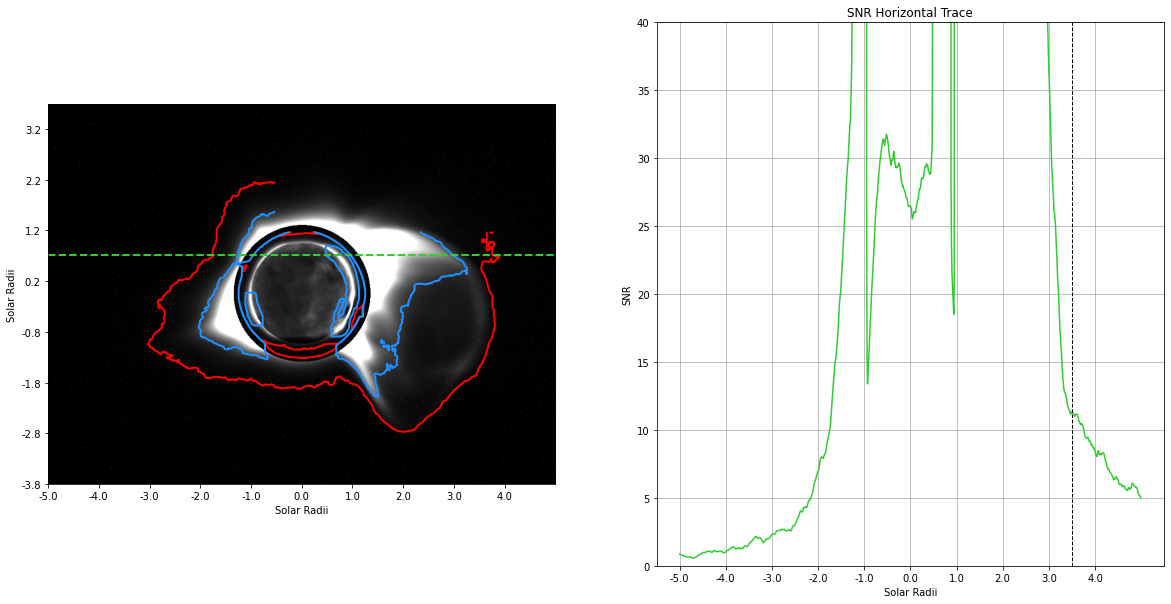

SNR at +3.5 Rs = 11


In [106]:
plot_snr(py_snr, py_detector)

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/masonjp2/Dropbox/suncet_dropbox/9000 Processing/data/filter_transmission/Al_150nm_thick_0.1-1250nm_range.csv')

In [4]:
df

,wavelength [angstrom],transmission
0,0.123984,9.999993e-01
1,0.125237,9.999992e-01
2,0.126515,9.999992e-01
3,0.128481,9.999992e-01
4,0.130510,9.999991e-01
...,...,...
645,10780.900000,8.935207e-09
646,11270.900000,7.332259e-09
647,11807.600000,6.591906e-09
648,12001.900000,6.531874e-09


<AxesSubplot:xlabel='wavelength [angstrom]'>

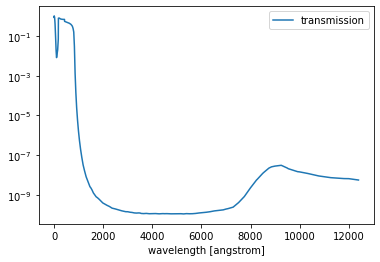

In [9]:
df.plot(x='wavelength [angstrom]', y='transmission', logy=True)

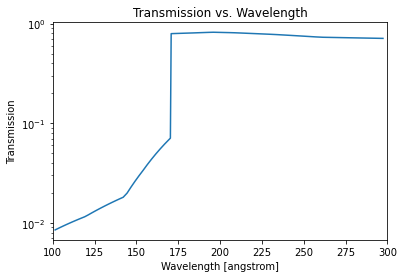

In [12]:
filtered_df = df[(df["wavelength [angstrom]"] >= 100) & (df["wavelength [angstrom]"] <= 300)]
plt.figure()
plt.semilogy(filtered_df["wavelength [angstrom]"], filtered_df["transmission"])
plt.xlabel("Wavelength [angstrom]")
plt.ylabel("Transmission")
plt.title("Transmission vs. Wavelength")
plt.xlim(100, 300)  # Zoom in on the wavelength range 100 to 300
plt.show()

In [13]:
df[(df["wavelength [angstrom]"] >= 170) & (df["wavelength [angstrom]"] <= 200)].mean()

wavelength [angstrom]    182.919740
transmission               0.744012
dtype: float64

In [15]:
df[(df["wavelength [angstrom]"] >= 4000) & (df["wavelength [angstrom]"] <= 1e7)].mean()

wavelength [angstrom]    7.360136e+03
transmission             5.896613e-09
dtype: float64

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import ipywidgets as widgets

# Load your image
image_path = '/Users/masonjp2/Desktop/debugging snr/onboard_processed_images_bs.npy'  # Replace with your actual image path
image = np.load(image_path)

def plot_image(min_intensity, max_intensity):
    fig, ax = plt.subplots(figsize=(10, 7))
    im = ax.imshow(image, cmap='gray', vmin=min_intensity, vmax=max_intensity, aspect='auto')
    fig.colorbar(im, ax=ax)
    plt.show()

# Assuming the intensity range of your image is from 0 to the max value in your image
min_intensity = widgets.IntSlider(min=0, max=image.max(), step=1, value=0, description='Min Intensity')
max_intensity = widgets.IntSlider(min=0, max=image.max(), step=1, value=image.max(), description='Max Intensity')

interact(plot_image, min_intensity=min_intensity, max_intensity=max_intensity)
